In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
# Load the raw data
covid_df = pd.read_csv("Rsources/Raw Data/covid.csv")

# Data Exploration of the Raw Data for covid postive patients only

In [3]:
covid_df.shape

(566602, 23)

In [4]:
covid_df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [5]:
covid_df.head(15)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [6]:
# Check if there are null values in any column
covid_df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [7]:
# Check for datatypes for the data columns
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

# Finding value counts of categorical variables

In [8]:
# Retaining rows that have covid_res= 1 i.e. only patients who are covid postive. Covid reusult pending and negative
# do not have any significance for the model and hence will be filtered out
covid_df = covid_df[covid_df['covid_res'] == 1] 
covid_df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,27424,1,2,10/6/20,8/6/20,10/6/20,2,1,88,2,...,2,1,2,2,2,2,2,99,1,2
220653,12ed19,1,1,11/6/20,1/6/20,9999-99-99,97,2,30,2,...,2,2,2,2,2,2,2,99,1,97
220654,6.60E+43,1,1,11/6/20,10/6/20,9999-99-99,97,2,27,2,...,2,2,2,2,2,2,2,2,1,97
220655,09f931,1,1,19-06-2020,16-06-2020,9999-99-99,97,2,36,2,...,2,2,2,2,2,2,2,1,1,97


In [9]:
# Checking value_counts of covid results column (1 - covid positive patients)
covid_df['covid_res'].value_counts()

1    220657
Name: covid_res, dtype: int64

In [10]:
# Create a subset of categorical variables only to check if the variable counts are good enough for the model
subset = covid_df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])

In [11]:
for col in subset.columns:
    print(subset[col].value_counts())

2    120799
1     99858
Name: sex, dtype: int64
1    152361
2     68296
Name: patient_type, dtype: int64
97    152361
2      61662
1       6549
99        85
Name: intubed, dtype: int64
2     167623
1      53031
99         3
Name: pneumonia, dtype: int64
97    120799
2      97749
1       1425
98       684
Name: pregnancy, dtype: int64
2     183618
1      36187
98       852
Name: diabetes, dtype: int64
2     216015
1       3877
98       765
Name: copd, dtype: int64
2     213821
1       6063
98       773
Name: asthma, dtype: int64
2     216769
1       3016
98       872
Name: inmsupr, dtype: int64
2     175560
1      44297
98       800
Name: hypertension, dtype: int64
2     213226
1       6283
98      1148
Name: other_disease, dtype: int64
2     214671
1       5162
98       824
Name: cardiovascular, dtype: int64
2     176599
1      43241
98       817
Name: obesity, dtype: int64
2     215072
1       4789
98       796
Name: renal_chronic, dtype: int64
2     202691
1      17109
98       857
N

In [12]:
# Change date_died column to categorical data "9999-99-99" to 0 (patient survived) and row with date to 1 (patient died)
covid_df.loc[covid_df.date_died == "9999-99-99", "date_died"] = 0

In [13]:
covid_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [14]:
covid_df.loc[covid_df.date_died != 0, "date_died"] = 1

In [15]:
covid_df.head(10)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,1,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,0,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,0,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,0,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,0,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [16]:
# Check counts of patients who survived vs. died
covid_df['date_died'].value_counts()

0    193536
1     27121
Name: date_died, dtype: int64

In [17]:
# Make sure that this column is an integer
covid_df["date_died"] = covid_df["date_died"].astype("int64")

# Visualization for additional data exploration

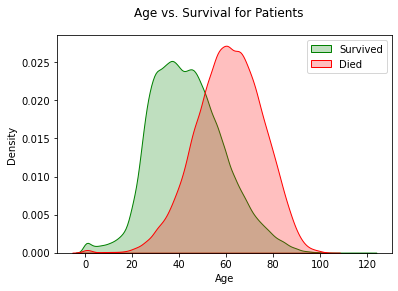

In [18]:
# Plotting Age vs Survival rate of Patients Admitted to the hospital
fig, ax = plt.subplots()

sns.kdeplot(covid_df[covid_df["date_died"]==0]["age"], shade=True, color="green", label="Survived", ax=ax)
sns.kdeplot(covid_df[covid_df["date_died"]==1]["age"], shade=True, color="red", label="Died", ax=ax)

ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Patients");
plt.savefig('output.png', dpi=300, bbox_inches='tight')

#### The above graph shows distribution of survived vs. died for different age groups. Since the goal of this model is not to study the effect of age on the covid deaths, age will not be considered a feature. So this column can be dropped in the analysis. This can be taken up as a separate experiment to study the age and death correlation in depth.

In [19]:
# Filter data only for patients that died
filter_df_death = covid_df[covid_df['date_died'] == 1] 
filter_df_death

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,1,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
24,008b81,1,1,15-05-2020,6/5/20,1,97,2,61,2,...,2,1,2,2,2,2,2,1,1,97
36,17394f,2,2,27-04-2020,27-04-2020,1,2,1,77,97,...,2,1,2,2,2,2,2,99,1,2
41,006ddc,1,2,26-04-2020,23-04-2020,1,2,1,53,2,...,2,2,2,2,1,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220609,1a9da9,1,2,18-05-2020,18-05-2020,1,2,1,64,2,...,2,1,2,2,1,2,2,99,1,2
220623,0a40ae,1,2,19-05-2020,11/5/20,1,2,2,59,2,...,2,1,2,2,1,2,2,99,1,2
220624,137522,2,2,19-05-2020,15-05-2020,1,2,1,66,97,...,2,2,2,2,2,2,2,2,1,2
220626,15629d,2,2,19-05-2020,15-05-2020,1,1,1,58,97,...,2,2,2,2,2,2,2,1,1,1


[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

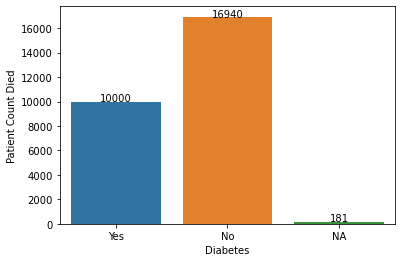

In [20]:
# Plotting Patient Count Died for patients having diabetes  
groupedvalues = filter_df_death.groupby('diabetes').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='diabetes',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Diabetes")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

#### From the above visual, diabetes seems to be an important feature as the number of deaths for diabetic covid positive patients is significant

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

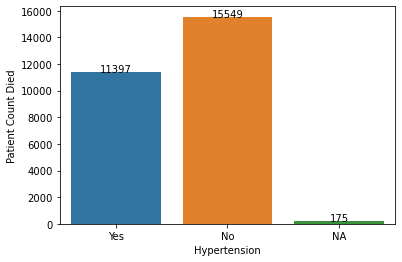

In [21]:
# Plotting Patient Count Died based for patients having hypertension 
groupedvalues = filter_df_death.groupby('hypertension').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='hypertension',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Hypertension")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

#### From the above visual, hypertension seems to be an important feature as the number of deaths for hypertensive covid positive patients is significant

[Text(0, 0, 'Yes'),
 Text(1, 0, 'No'),
 Text(2, 0, 'NA'),
 Text(3, 0, 'Not Provided')]

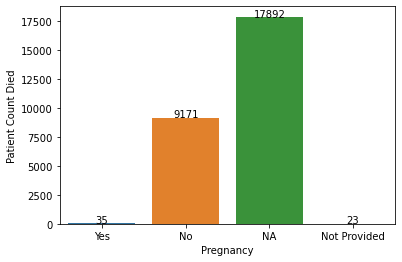

In [22]:
# Plotting Patient Count Died for pregnant patients
groupedvalues = filter_df_death.groupby('pregnancy').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='pregnancy',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Pregnancy")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA", "Not Provided"])

#### From the above visual, pregnancy seems to be an insignificant feature in the dataset's patient population as the number of deaths for pregnant covid positive patients is a very small number

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

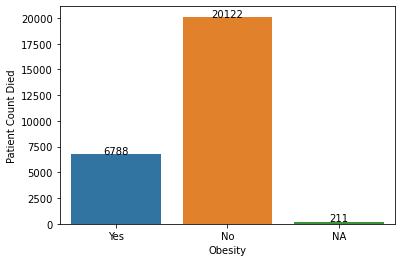

In [23]:
# Plotting Patient Count Died based on obesity 
groupedvalues = filter_df_death.groupby('obesity').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='obesity',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Obesity")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

#### From the above visual, obesity seems to be an important feature as the number of deaths for obese covid positive patients is significant

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

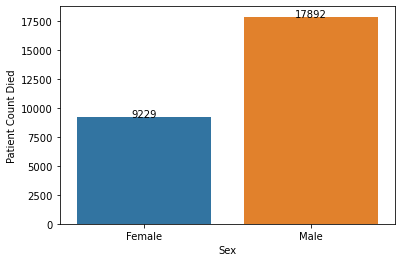

In [24]:
# Plotting Patient Count Died based on sex 
groupedvalues = filter_df_death.groupby('sex').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='sex',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Sex")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Female", "Male"])

#### From the above visual, the number of deaths in males seems to be higher but since the objective of this model is not to study the effect of sex on covid deaths, the sex column will be dropped from the feature list

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

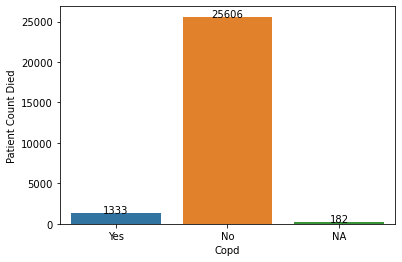

In [25]:
# Plotting Patient Count Died based on copd 
groupedvalues = filter_df_death.groupby('copd').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='copd',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Copd")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

#### From the above visual, the death of covid patients suffering with copd in significant enough to be retained in the feature list.

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

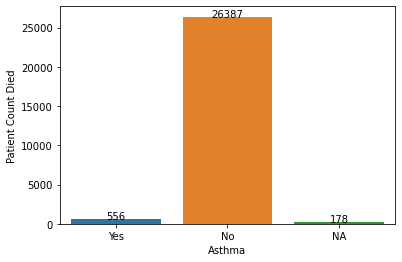

In [26]:
# Plotting Patient Count Died based on asthma 
groupedvalues = filter_df_death.groupby('asthma').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='asthma',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Asthma")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

#### From the above visual, the death of covid patients suffering with asthma is less but since this is an underlying condition, it will be included in the feature list for our model. The contribution of asthma maybe smaller in the current patient population but may become significant in larger datasets and hence this feature will be retained.

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

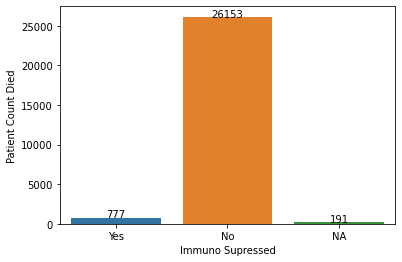

In [27]:
# Plotting Patient Count Died based for immuno compromised patients 
groupedvalues = filter_df_death.groupby('inmsupr').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='inmsupr',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Immuno Supressed")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

#### From the above visual, the death of immuno compromised covid patients is less but since this is an underlying condition, it will be included in the feature list for our model. The contribution of immuno compromised conditions maybe small in the current patient population but may become significant in larger datasets and hence this feature will be retained.

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

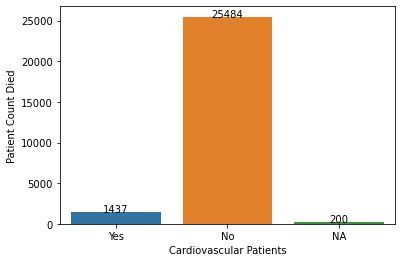

In [28]:
# Plotting Patient Count Died based for cardiovascular patients 
groupedvalues = filter_df_death.groupby('cardiovascular').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='cardiovascular',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Cardiovascular Patients")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

#### From the above visual, the death of covid patients with cardiovascular issues is significant enough and will be added in the feature list

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

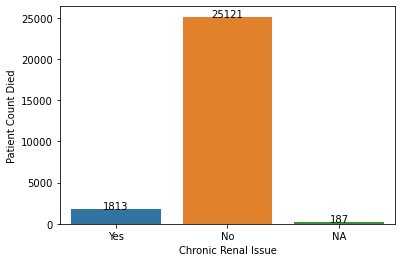

In [29]:
# Plotting Patient Count Died based for patients with chronic renal issues
groupedvalues = filter_df_death.groupby('renal_chronic').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='renal_chronic',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Chronic Renal Issue")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

#### From the above visual, the death of covid patients with chronic renal issues is significant enough and will be added in the feature list

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

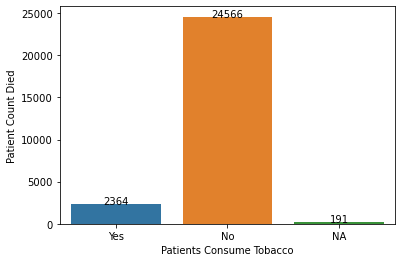

In [30]:
# Plotting Patient Count Died based for patients who consume tobacco
groupedvalues = filter_df_death.groupby('tobacco').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='tobacco',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Patients Consume Tobacco")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

#### From the above visual, the death of covid patients who consume tobacco is significant enough and will be added in the feature list

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

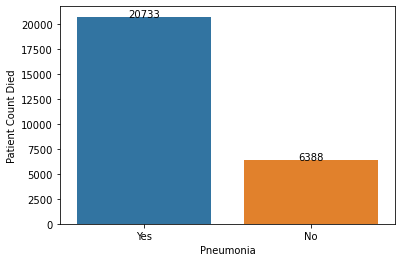

In [31]:
# Plotting Patient Count Died based for patients with pneumonia
groupedvalues = filter_df_death.groupby('pneumonia').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='pneumonia',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Pneumonia")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No"])

#### From the above visual, the death of covid patients with pneumonia is very high but this is not an underlying/pre-existing health condition. It is developed as a result of contracting covid and hence this will not be included in our feature list.

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Ignored')]

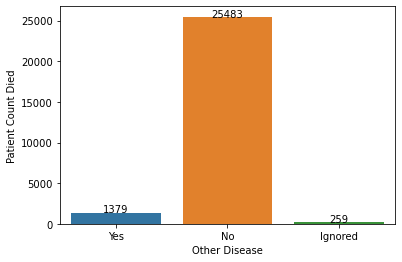

In [32]:
# Plotting Patient Count Died based for patients with other_disease
groupedvalues = filter_df_death.groupby('other_disease').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='other_disease',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Other Disease")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "Ignored"])

#### From the above visual, the death of covid patients with other diseases is significant but since our study focuses on targeted underlying conditions, the other_disease category will be dropped from the feature list

In [33]:
# Create new dataframe with only pre-existing conditions for patients who died
pre_existing_df_died = filter_df_death.drop(columns= ['sex', 'icu', 'covid_res', 'contact_other_covid', 'intubed', 'patient_type'])
pre_existing_df_died = pre_existing_df_died[pre_existing_df_died['date_died'] == 1] 
pre_existing_df_died = pre_existing_df_died.drop(columns= ['id','entry_date','date_symptoms','date_died','age'])
pre_existing_df_died

,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
4,2,2,1,2,2,2,1,2,1,2,2,2
5,1,97,1,2,2,2,2,2,2,2,2,2
24,2,2,2,2,2,2,1,2,2,2,2,2
36,1,97,2,2,2,2,1,2,2,2,2,2
41,1,2,1,2,2,2,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
220609,1,2,1,2,2,2,1,2,2,1,2,2
220623,2,2,1,2,2,2,1,2,2,1,2,2
220624,1,97,1,2,2,2,2,2,2,2,2,2
220626,1,97,2,2,2,2,2,2,2,2,2,2


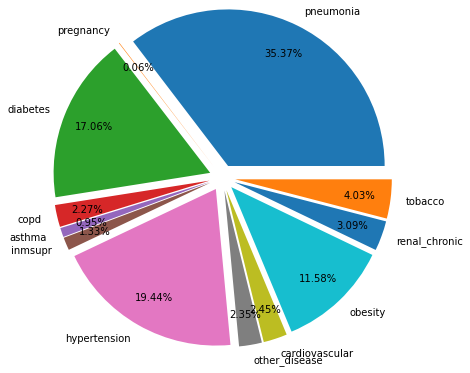

In [34]:
# Plotting precentage of pre-exsiting conditions in the dataset where patient actually died -- Anshu
pre_existing_count_died = []
pre_existing_labels_died = []
for col in pre_existing_df_died.columns:
    pre_existing_count_died.append(len(pre_existing_df_died[pre_existing_df_died[col] == 1].index))
    pre_existing_labels_died.append(col)
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(pre_existing_count_died, labels=pre_existing_labels_died, autopct='%.2f%%', 
        pctdistance = 0.8,
        explode=[0.2]*12, 
        radius = 2.4)
#ax.set_title('Pre-existing Conditions')
plt.show()

#### The above pie chart shows the % distribution of pre-existing coditions in the patients who died due to covid. This gives additional insight into which columns should be included in our feature list:
 - Death due to Pneumonia has the highest % but as its not an underlying condition but a result of covid, this will be dropped
 - Death due to Pregnancy is a very small % and can be dropped
 - Other_Disease is not a clear indication of an exact underlying condition and will be dropped
 - All other features will be included in the feature list (diabetes, hypertension, copd, asthma, inmsupr, cardiovascular, obesity, renal_chronic, tobacco)